In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

In [19]:
df=pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [21]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [22]:
df.shape

(569, 33)

## Mapping the "malignant" to 0 and "benign" to 1

In [23]:
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

In [24]:
df['diagnosis'].unique()

array([0, 1], dtype=int64)

In [25]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Dependant and independant variables 

In [26]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [27]:
x.drop(['Unnamed: 32'],axis=1,inplace=True)

In [28]:
x.shape

(569, 31)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0, stratify=y)

In [31]:
## We now standardize the dataset and then convert it into 3d to fit into the CNN models

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
x_train=x_train.reshape(455,31,1)
x_test=x_test.reshape(114,31,1)

In [37]:


model=keras.Sequential()

model.add(keras.layers.Conv1D(32,2,activation='relu',input_shape=(31,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv1D(64,2,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 30, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1856)              0

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history=model.fit(
    x_train, y_train,validation_data=(x_test,y_test),epochs=50,verbose=1
)

Epoch 1/50
15/15 [==============================] - 2s 23ms/step - loss: 0.3441 - accuracy: 0.8659 - val_loss: 0.4454 - val_accuracy: 0.9123
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0949 - accuracy: 0.9560 - val_loss: 0.3885 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1358 - accuracy: 0.9626 - val_loss: 0.3494 - val_accuracy: 0.9211
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0999 - accuracy: 0.9538 - val_loss: 0.3566 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1019 - accuracy: 0.9582 - val_loss: 0.3423 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0659 - accuracy: 0.9758 - val_loss: 0.3069 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9736 - val_loss: 0.2717 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

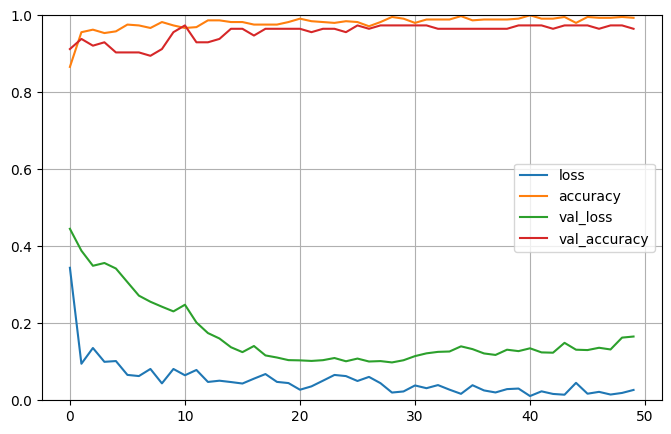

In [41]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()